In [1]:
import nsucb
from bandit_env import *

In [2]:
#%%
# Algorithms
n=3
T = 1000
tau = int(4 * np.sqrt(n*np.log(T)))
print(f"tau={tau}")
xi = 0.5
B = 1
gamma = 1 - 1/(4*np.sqrt(T))
print(f"gamma={gamma}")

ucb = nsucb.UCB(n,alpha=xi)
d= nsucb.DiscountedUCB(n,B=B,gamma=gamma)
sw= nsucb.SlidingUCB(n,tau=tau,B=B,xi=xi)
swu = nsucb.SlidingUCB_uniform_discount(n,tau,B=B,xi=xi)
swd = nsucb.SlidingUCB_discountedN(n,tau,B=B,xi=xi)

tau=18
gamma=0.992094305849579


## Abruptly Changing env

In [3]:
# Arms sequence
def arm_f(t):
    arms = [Bernoulli(0.5),Bernoulli(0.1),Bernoulli(0.4)]
    if t> 300 and t<500 :
        arms[1] = Bernoulli(0.9)
    return arms 

a= MAB_NS(3,arm_f)

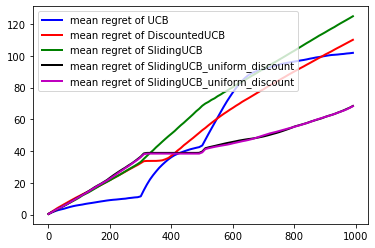

In [32]:
RunExpes([ucb,d,sw,swd,swu],a,50,T,non_stationary=True,quantiles=False)

In [ ]:
RunExpes([sw,swd,swu],a,30,1000,non_stationary=True)

## Stationary Problem

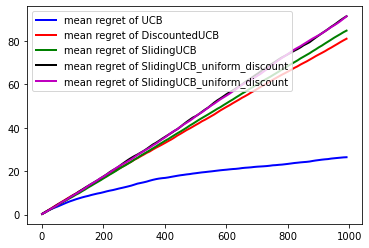

In [29]:
# More abrupt
arms = [Bernoulli(0.2),Bernoulli(0.3),Bernoulli(0.4)]
a= MAB(arms)

RunExpes([ucb,d,sw,swu,swd],a,30,1000,quantiles=False)

## Continuously changing env

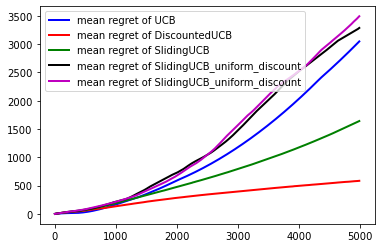

In [17]:
def arm_f(t):
    arms = [Gaussian(0.2),Gaussian(0.4+t/T),Gaussian(0.7)]
    return arms 

a= MAB_NS(3,arm_f)

RunExpes([ucb,d,sw,swu,swd],a,30,5000,quantiles=False,non_stationary=True)